In [1]:
# Import Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [8]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precip_data = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= "2016-08-23"). filter(Measurement.date <= "2017-08-23").all()

# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
precip_df = pd.DataFrame(precip_data)
precip_df['date'] = pd.to_datetime(precip_df['date'])
precip_df = precip_df.set_index('date')
precip_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


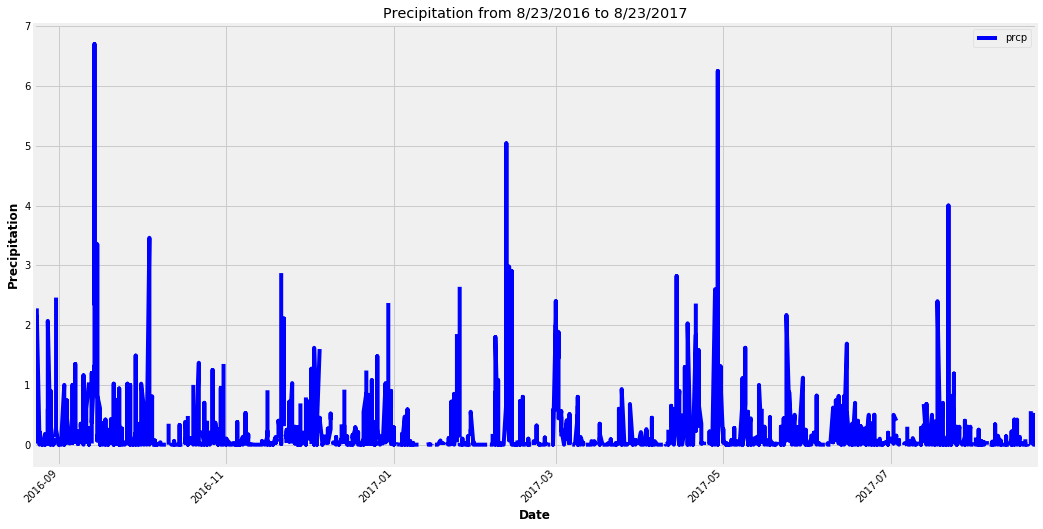

In [9]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_plot = precip_df.plot(figsize = (16, 9), sort_columns=True, rot=45, use_index=True, legend=True, grid=True, color='b')
plt.ylabel('Precipitation', weight='bold')
plt.xlabel('Date', weight='bold')
plt.title("Precipitation from 8/23/2016 to 8/23/2017")
plt.savefig("Images/Precipitation_barchart.png")
plt.show()

![precipitation](Images/precipitation.png)

In [10]:
# Use Pandas to print the summary statistics for the precipitation data.
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [11]:
# Design a query to calculate the total number of stations.
station_num = session.query(Station.id).count()
station_num

9

In [12]:
# Design a query to find the most active stations.
# List the stations and observation counts in descending order.
# Which station has the highest number of observations?
active_stations = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).\
                                                                                      desc()).all()
# Display Most Active Stations
active_stations

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [13]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
active_stations = 'USC00519281'
high_avg_active = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == active_stations).all()
high_avg_active

[(54.0, 85.0, 71.66378066378067)]

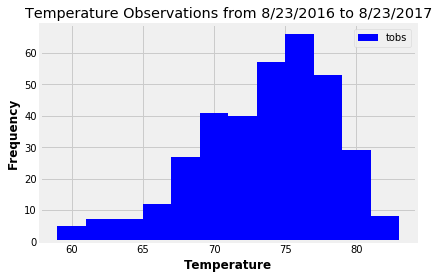

In [14]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
# Filter by the station with the highest number of observations.
# Plot the results as a histogram with `bins=12`.
highest_tobs = session.query(Measurement.tobs).\
filter(Measurement.station == "USC00519281", Measurement.station == Station.station, Measurement.date >="2016-08-23",\
       Measurement.date <="2017-08-23").all()

temps = [temp[0] for temp in highest_tobs]

plt.hist(temps, bins=12, color='b')
plt.title("Temperature Observations from 8/23/2016 to 8/23/2017")
plt.ylabel('Frequency', weight='bold')
plt.xlabel('Temperature', weight='bold')
labels = ['tobs']
plt.legend(labels)
plt.savefig('Images/station-histogram.png')


![precipitation](Images/station-histogram.png)

In [15]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [16]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
my_trip = calc_temps('2017-01-06', '2017-01-20')
print(my_trip)


[(60.0, 69.91397849462365, 81.0)]


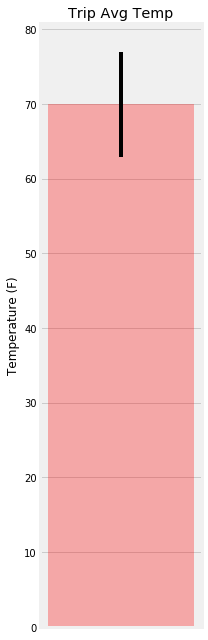

In [17]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

#bar (tmax - tmin)
peak_to_peak = my_trip[0][2] - my_trip[0][0]
avg_temp = my_trip[0][1]

#plot figure
fig, ax = plt.subplots(figsize = (3, 9))

ax.bar(1, avg_temp, yerr = peak_to_peak/3, width = 0.5, color = "red", alpha=0.30)
ax.xaxis.grid(False)

#set labels
ax.set_xticks([1])
ax.set_xticklabels([""])
ax.set_title('Trip Avg Temp')
ax.set_ylabel('Temperature (F)')

#save fig
plt.savefig("Images/temperature")

#show figure
plt.tight_layout()
plt.show()

In [18]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

my_trip_start = '2017-01-06'
my_trip_end = '2017-01-20'

selections = ([Station.station, Station.name, func.sum(Measurement.prcp), Station.latitude, Station.longitude, 
               Station.elevation])

yearly_rain = (session.query(*selections).filter(Station.station == Measurement.station).filter(Measurement.date 
            >= my_trip_start).filter(Measurement.date <= my_trip_end).group_by(Station.station)\
               .order_by(func.sum(Measurement.prcp).desc()).all())

#convert query object to data frame
yearly_rain_table = pd.DataFrame(np.array(yearly_rain))
#rename columns
yearly_rain_table = yearly_rain_table.rename(columns={0: "Station", 1: "Location", 
                                                    2: "Total Precipitation", 3: "Latitude", 
                                                    4: "Longitude", 5: "Elevation"})

yearly_rain_table


,Station,Location,Total Precipitation,Latitude,Longitude,Elevation
0,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.62,21.5213,-157.8374,7.0
1,USC00516128,"MANOA LYON ARBO 785.2, HI US",0.21000000000000002,21.3331,-157.8025,152.4
2,USC00519281,"WAIHEE 837.5, HI US",0.13,21.45167,-157.84888999999998,32.9
3,USC00513117,"KANEOHE 838.1, HI US",0.06,21.4234,-157.8015,14.6
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.01,21.33556,-157.71139,19.5
5,USC00517948,"PEARL CITY, HI US",0.0,21.3934,-157.9751,11.9
6,USC00519397,"WAIKIKI 717.2, HI US",0.0,21.2716,-157.8168,3.0


## Optional Challenge Assignment

In [19]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date


#set the start and end date for the trip
trip_start = "2017-01-06"
trip_end = "2017-01-20"

#calculate trip length
start_day = int(trip_start[-2:])
end_day = int(trip_end[-2:])
trip_length = end_day - start_day + 1

#start date as datetime object
trip_start = dt.datetime.strptime(trip_start, '%Y-%m-%d')
#list dates (MM-DD) of trip
date_range = [dt.datetime.strftime(trip_start + dt.timedelta(days = x), '%m-%d') 
            for x in range(0, tripLength)]

#calculate normals for each date
normals = [daily_normals(date) for date in dateList]

normals

[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [20]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
#extract normals into a list of lists
normals = [np.array(normal) for normal in normals]

#convert normals list into a data frame
normals_table = pd.DataFrame(normals)

#add date column
normals_table["Date"] = date_range

#set index and rename columns
normals_table = normals_table.set_index("Date")
normals_table = normals_table.rename(columns={0:"Min Temp", 1:"Avg Temp", 2:"Max Temp"})

normals_table

NameError: name 'normals' is not defined

<IPython.core.display.Javascript object>


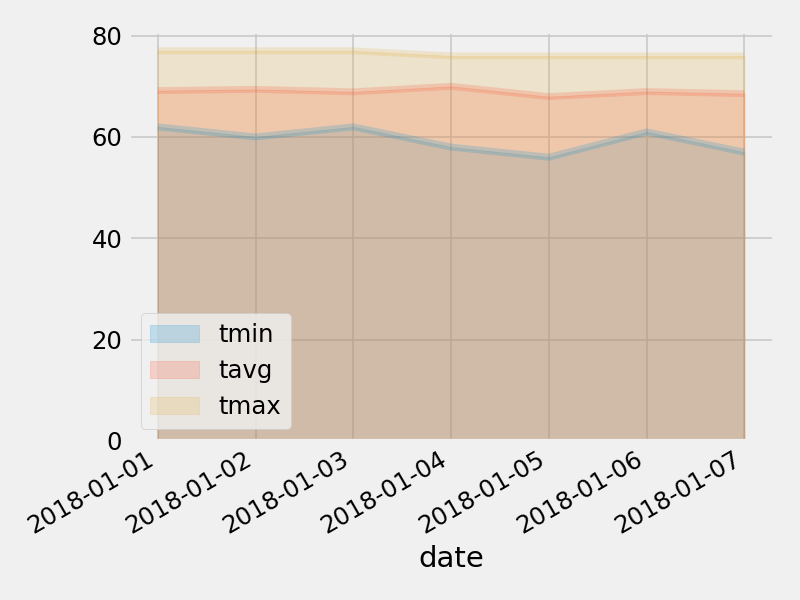

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
